In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [21]:
financial_data = pd.read_csv('../Cleaned_Data/Clean_NBA_Financial_Data.csv')
financial_data.head(10)

,City,State,Team Name,Arena Cost (millions),Year of Arena Construction,Arena Capacity,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
0,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,326,85,159,45.3
1,Boston,Massachusetts,Boston Celtics,160.0,1995,19156,443,88,185,72.5
2,Brooklyn,New York,Brooklyn Nets,1000.0,2012,17732,367,-5,187,55.1
3,Charlotte,North Carolina,Charlotte Hornets,260.0,2005,19077,269,35,165,23.7
4,Chicago,Illinois,Chicago Bulls,175.0,1994,20917,372,115,158,70.0
5,Cleveland,Ohio,Cleveland Cavaliers,100.0,1994,19432,348,78,158,67.4
6,Dallas,Texas,Dallas Mavericks,420.0,2001,19200,429,83,177,57.4
7,Denver,Colorado,Denver Nuggets,187.0,1999,19520,348,71,171,41.6
8,Detroit,Michigan,Detroit Pistons,862.9,2017,20332,274,83,132,35.8
9,San Franciso,California,Golden State Warriors,1400.0,2019,18064,765,79,197,100.4


In [22]:
city_data = pd.read_csv('../Cleaned_Data/Clean_US_City_Data.csv')
city_data.head(10)

,city,state_id,state_name,county_name,county_name_all,urbanPopulation,municipalPopulation,density,military,cdp,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_name,cbsa_metro,csa_name
0,New York,NY,New York,Queens,Queens|Kings|Richmond|Bronx|New York,18908608.0,8622467.0,11080.3,False,False,...,29.0,11.3,17.2,13.9,41.1,6.7,2.0,"New York-Newark-Jersey City, NY-NJ-PA",True,"New York-Newark, NY-NJ-CT-PA"
1,Los Angeles,CA,California,Los Angeles,Los Angeles,11922389.0,3881041.0,3184.7,False,False,...,48.1,10.8,16.6,13.7,31.3,10.6,2.3,"Los Angeles-Long Beach-Anaheim, CA",True,"Los Angeles-Long Beach, CA"
2,Chicago,IL,Illinois,Cook,Cook|DuPage,8497759.0,2721914.0,4614.5,False,False,...,29.0,11.4,16.9,7.9,34.1,9.8,2.9,"Chicago-Naperville-Elgin, IL-IN-WI",True,"Chicago-Naperville, IL-IN-WI"
3,Miami,FL,Florida,Miami-Dade,Miami-Dade,6080145.0,443665.0,4758.9,False,False,...,72.3,11.6,20.0,29.9,28.2,19.0,2.0,"Miami-Fort Lauderdale-Pompano Beach, FL",True,"Miami-Port St. Lucie-Fort Lauderdale, FL"
4,Houston,TX,Texas,Harris,Harris|Fort Bend|Montgomery,5970127.0,2296253.0,1384.0,False,False,...,44.8,10.4,19.6,13.5,27.4,24.2,3.6,"Houston-The Woodlands-Sugar Land, TX",True,"Houston-The Woodlands, TX"
5,Dallas,TX,Texas,Dallas,Dallas|Rockwall|Collin|Kaufman|Denton,5830932.0,1300642.0,1478.7,False,False,...,42.4,10.9,17.5,9.3,26.4,23.5,3.8,"Dallas-Fort Worth-Arlington, TX",True,"Dallas-Fort Worth, TX-OK"
6,Philadelphia,PA,Pennsylvania,Philadelphia,Philadelphia,5683533.0,1593208.0,4578.4,False,False,...,15.7,16.9,22.7,6.9,32.8,7.3,4.2,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",True,"Philadelphia-Reading-Camden, PA-NJ-DE-MD"
7,Atlanta,GA,Georgia,Fulton,Fulton|DeKalb,5180179.0,494838.0,1412.3,False,False,...,5.4,11.8,17.7,2.0,27.5,10.8,4.3,"Atlanta-Sandy Springs-Alpharetta, GA",True,"Atlanta--Athens-Clarke County--Sandy Springs, ..."
8,Washington,DC,District of Columbia,District of Columbia,District of Columbia,5116378.0,670587.0,4235.7,False,False,...,11.5,11.0,15.1,3.1,30.5,3.4,4.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV",True,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA"
9,Boston,MA,Massachusetts,Suffolk,Suffolk,4328315.0,665945.0,5319.0,False,False,...,19.6,12.0,17.5,11.2,30.6,3.3,2.4,"Boston-Cambridge-Newton, MA-NH",True,"Boston-Worcester-Providence, MA-RI-NH-CT"


In [23]:
city_data = city_data.drop(columns= ["county_name_all", "military",'id', 'male', 'female','married', 'divorced','never_married', 'widowed', 'cbsa_metro', 'health_uninsured', 'disabled', 'cdp', 'township', 'limited_english', 'cbsa_name', 'csa_name', 'veteran', 'married', 'race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over'])
city_data.columns

Index(['city', 'state_id', 'state_name', 'county_name', 'urbanPopulation',
       'municipalPopulation', 'density', 'importance_Ranking', 'age_median',
       'age_over_65', 'age_18_to_24', 'age_over_18', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'poverty',
       'commute_time'],
      dtype='object')

In [37]:
team_yearly = pd.read_csv('../Additional_Data/team_yearly_data.csv')
team_yearly['Year'] = team_yearly['Year'].str.split('-|/', expand=True)[0]

# Convert 'Year' column to integer type
team_yearly['Year'] = team_yearly['Year'].astype(int)
team_yearly.to_csv('../Cleaned_Data/team_yearly_data_cleaned.csv', index=False)

team_yearly

,Year,City,State,Team Name,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Revenue(Millions),Operating Income(Millions),Player Expenses,Ticket Revenue,Win/Loss %
0,2022,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,326,85.0,159.0,73.0,0.500
1,2021,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,282,84.0,121.0,53.0,0.524
2,2020,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,199,37.0,93.0,20.0,0.569
3,2019,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,222,36.0,111.0,31.0,0.299
4,2018,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,251,78.0,95.0,32.0,0.354
...,...,...,...,...,...,...,...,...,...,...,...,...
651,2018,Washington DC,Washington DC,Washington Wizards,260.0,1997,20356,269,55.0,142.0,53.0,0.390
652,2019,Washington DC,Washington DC,Washington Wizards,260.0,1997,20356,231,39.0,117.0,37.0,0.347
653,2020,Washington DC,Washington DC,Washington Wizards,260.0,1997,20356,213,15.0,109.0,5.0,0.472
654,2021,Washington DC,Washington DC,Washington Wizards,260.0,1997,20356,291,90.0,130.0,47.0,0.427


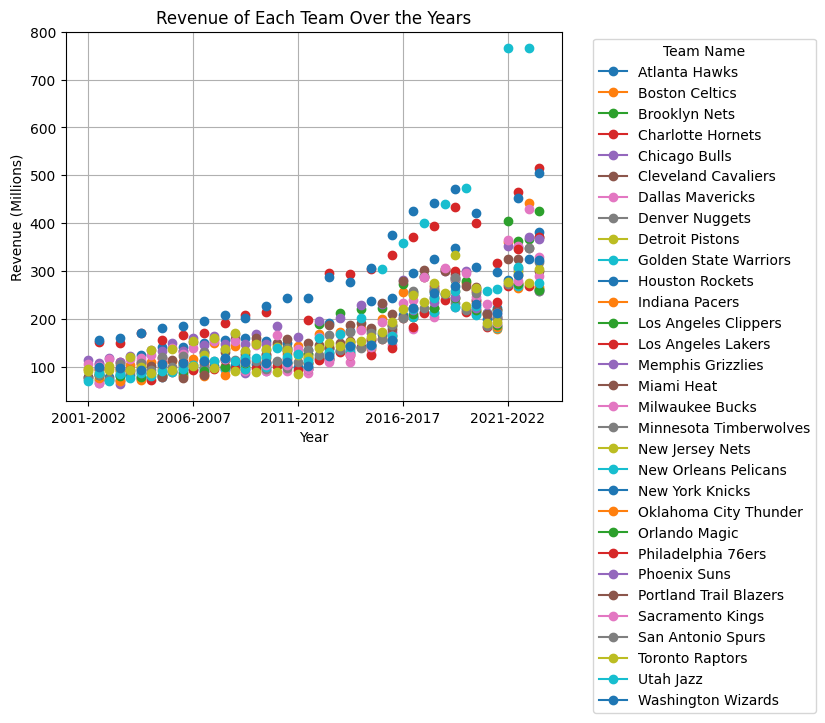

In [34]:
pivot_df = team_yearly.pivot(index='Year', columns='Team Name', values='Revenue(Millions)')

# Plotting
pivot_df.plot(kind='line', marker='o', linestyle='-')
plt.title('Revenue of Each Team Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.legend(title='Team Name', bbox_to_anchor=(1.05, 1), loc='upper left')
  # Set x-axis limits from 2010 to 2023
plt.show()

In [52]:
# Calculate revenue increase between consecutive years for each team
team_yearly['Revenue Increase'] = team_yearly.groupby('Team Name')['Revenue(Millions)'].diff()

# Filter rows with positive revenue increase
positive_increase_teams = team_yearly[team_yearly['Revenue Increase'] > 0]

# Sort positive_increase_teams DataFrame by 'Revenue Increase' in descending order
positive_increase_teams_sorted = positive_increase_teams.sort_values(by='Revenue Increase', ascending=False)

print("DataFrame Sorted by Revenue Increase in Descending Order:")
(positive_increase_teams_sorted.head(50))


DataFrame Sorted by Revenue Increase in Descending Order:


,Year,City,State,Team Name,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Revenue(Millions),Operating Income(Millions),Player Expenses,Ticket Revenue,Win/Loss %,Revenue Increase
196,2021,San Francisco,California,Golden State Warriors,1400.0,2019,18064,765,206.0,169.0,257.0,0.646,507.0
45,2021,Brooklyn,New York,Brooklyn Nets,1000.0,2012,17732,405,-34.0,174.0,76.0,0.537,193.0
434,2021,New York,New York,New York Knicks,123.0,1968,19812,452,155.0,111.0,133.0,0.451,154.0
23,2021,Boston,Massachusetts,Boston Celtics,160.0,1995,19156,361,137.0,137.0,125.0,0.622,150.0
303,2021,Los Angeles,California,Los Angeles Lakers,375.0,1999,18997,465,115.0,163.0,102.0,0.402,149.0
281,2021,Los Angeles,California,Los Angeles Clippers,375.0,1999,19068,362,12.0,169.0,59.0,0.512,143.0
369,2021,Milwaukee,Wisconsin,Milwaukee Bucks,1200.0,2018,17500,352,51.0,151.0,85.0,0.622,140.0
86,2021,Chicago,Illinois,Chicago Bulls,175.0,1994,20917,352,135.0,117.0,92.0,0.561,139.0
130,2021,Dallas,Texas,Dallas Mavericks,420.0,2001,19200,364,143.0,117.0,105.0,0.634,133.0
237,2021,Houston,Texas,Houston Rockets,235.0,2003,18055,350,113.0,128.0,86.0,0.244,127.0
